### Import libraries

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
from sklearn.metrics import r2_score

### 

### Load data

In [3]:
df=pd.read_csv('gld_price_data.csv')

In [4]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
df.shape

(2290, 6)

In [7]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
continues_features=[feature for feature in df.columns if df[feature].dtype!='O']

In [12]:
continues_features

['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']

In [13]:
df[continues_features]

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2730.129883,124.489998,14.380000,15.5600,1.193118


In [14]:
df[continues_features].corr()

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


In [16]:
correlation=df[continues_features].corr()

<Axes: >

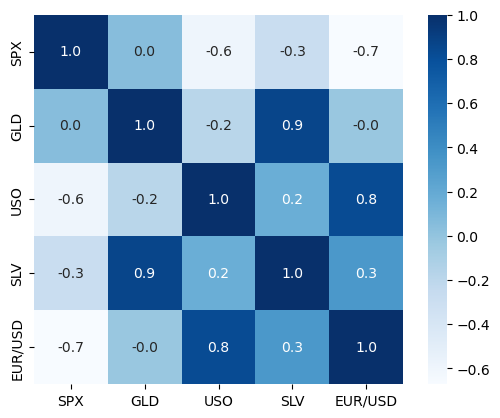

In [20]:
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,cmap='Blues')

In [21]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

<Axes: xlabel='GLD', ylabel='Density'>

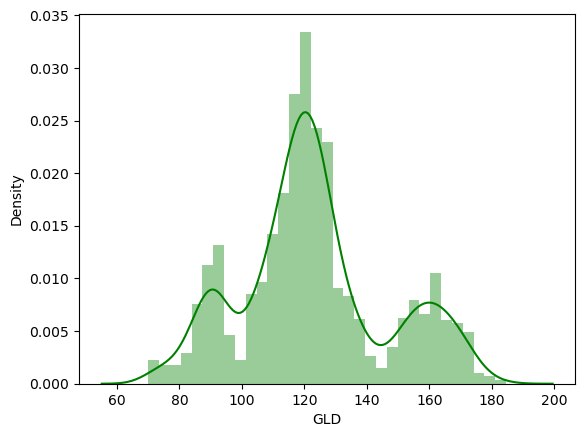

In [22]:
sns.distplot(df.GLD,color='green')

### 

### Data splitting

In [24]:
x=df.drop(['Date','GLD'],axis=1)
y=df.GLD

In [54]:
x.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


### 

### Train & Test data

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=2)

In [62]:
print('Train Data')
print(f'shape of x_train : {x_train.shape}')
print(f'shape of y_train : {y_train.shape}\n')
print('Test Data')
print(f'shape of x_test : {x_test.shape}')
print(f'shape of y_test : {y_test.shape}')

Train Data
shape of x_train : (1832, 4)
shape of y_train : (1832,)

Test Data
shape of x_test : (458, 4)
shape of y_test : (458,)


### 

### Model training

In [29]:
forest=RandomForestRegressor(oob_score=True)

In [30]:
forest.fit(x_train,y_train)

RandomForestRegressor(oob_score=True)

In [31]:
y_pred=forest.predict(x_test)

### 

### Model performance

In [63]:
score=r2_score(y_test,y_pred)
print(score)

0.9898402291089159


### 

### Prediction of new test data

In [66]:
prediction=forest.predict([[1401.02002, 75.089996, 16.077, 1.779006]])

In [68]:
print(f'Predicted GLD price :{prediction[0]}')

Predicted GLD price :87.43810023999997


### 

### Compare Actual and Predicted values

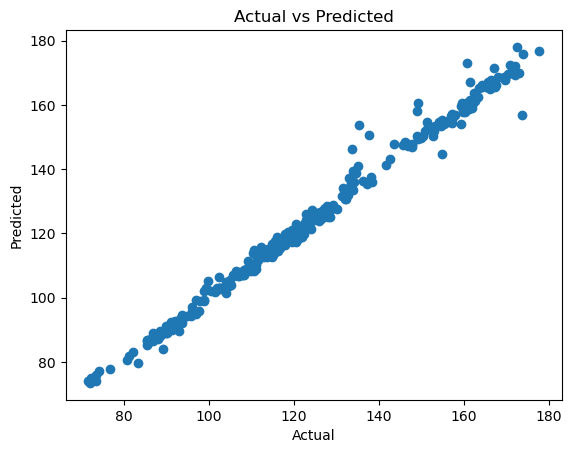

In [73]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

<Axes: ylabel='Density'>

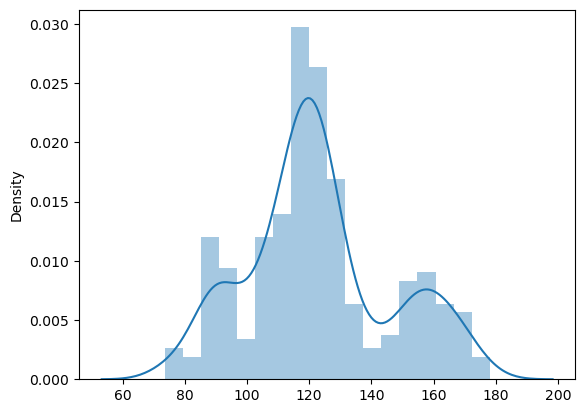

In [51]:
sns.distplot(y_pred)

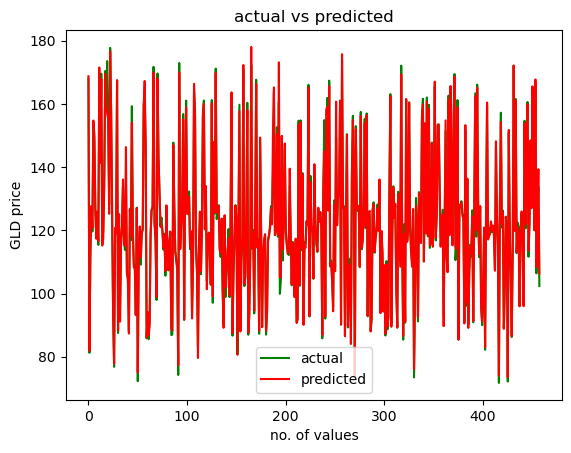

In [53]:
plt.plot(list(y_test),color='green',label='actual')
plt.plot(y_pred,color='red',label='predicted')
plt.title('actual vs predicted')
plt.xlabel('no. of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()

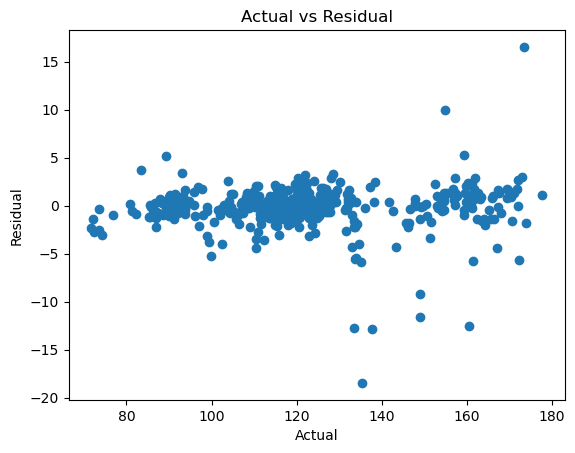

In [74]:
residual=y_test-y_pred

plt.scatter(y_test,residual)
plt.xlabel('Actual')
plt.ylabel('Residual')
plt.title('Actual vs Residual')
plt.show()